WELCOME TO MY LIVE DEMO!!!

Now let's do some coding

We will be grabbing data from pre-produced files that has the data stored already from the IFCB dashboard

Now before we begin lets get our supply chest so that we can have our tools to code

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import requests
import json
import re
import csv
import plotly as py
import plotly.graph_objs as go
import matplotlib

NOW THAT WE HAVE OUR TOOLS LETS GRAB OUR DATA AND OPEN OUR FILE

In [2]:

dataf=pd.read_csv('OUT.csv')
dataf



,Unnamed: 0,Asterionellopsis,Cerataulina,Ceratium,Chaetoceros,Corethron,Coscinodiscus,Cylindrotheca,DactFragCerataul,Dactyliosolen,...,bad,ciliate_mix,clusterflagellate,detritus,dino30,kiteflagellates,mix,mix_elongated,pennate,tintinnid
0,2016-06-10T18:50:37Z,4.562654,14.828626,0.570332,29.657253,0.000000,0.000000,1.140664,2.281327,5.132986,...,0.000000,5.132986,4.562654,88.971758,58.173841,4.562654,2723.334246,49.048533,1.140664,1.710995
1,2016-06-10T19:10:30Z,5.721143,7.628191,1.907048,20.024001,1.430286,1.430286,0.476762,2.383810,1.430286,...,0.000000,5.721143,1.907048,89.154479,52.920573,2.860572,2668.436460,52.443811,1.430286,0.953524
2,2016-06-10T19:33:43Z,5.577633,14.873689,2.324014,24.169745,0.464803,0.464803,2.788817,2.788817,4.648028,...,0.464803,6.042436,0.929606,85.058910,51.128307,9.760859,2714.448290,66.931602,0.929606,0.464803
3,2016-06-10T19:56:55Z,4.477509,17.014533,1.791003,26.865052,1.791003,0.447751,1.343253,0.000000,6.716263,...,0.000000,7.611765,1.343253,79.251902,52.386851,4.925259,2550.388902,75.222145,1.791003,0.447751
4,2016-06-10T20:20:07Z,5.260777,16.158099,0.375770,42.461982,2.254619,1.127309,4.133467,3.381928,19.915797,...,0.000000,5.260777,0.751540,59.371621,37.576975,6.763856,1752.590126,58.620081,0.751540,0.375770
5,2016-06-10T20:43:20Z,3.890030,19.839155,0.778006,56.405441,0.778006,0.000000,4.279033,2.334018,18.283143,...,0.389003,6.224049,1.167009,70.020547,42.790334,8.169064,1840.373381,77.022602,1.167009,1.167009
6,2016-06-10T21:06:31Z,5.032454,29.355982,0.838742,72.551212,1.677485,0.000000,6.709939,1.677485,25.162270,...,0.000000,5.451825,1.258114,97.294111,49.066426,5.451825,2132.502382,98.552224,0.838742,0.838742
7,2016-06-10T21:29:45Z,6.986178,31.437799,1.746544,75.101409,2.619817,0.873272,4.802997,5.239633,23.578349,...,0.873272,5.676269,1.746544,100.426302,53.706240,9.169358,2325.087218,89.073764,0.873272,1.309908
8,2016-06-10T21:52:56Z,5.812956,33.089137,0.447151,75.121284,1.788602,0.894301,2.682903,4.024354,16.991719,...,0.000000,5.365806,2.682903,84.064294,64.836822,4.918655,2422.214258,93.007304,3.577204,1.788602
9,2016-06-10T22:16:09Z,4.939666,41.762628,0.898121,76.340288,1.796242,0.000000,4.490605,4.041545,13.920876,...,0.449061,9.879331,1.796242,101.936738,59.275989,11.675574,2497.674615,105.080162,3.143424,0.898121


COOL! NOW LETS MANIPULATE THE FILE TO MAKE IT LOOK BETTER. TAKE A LOOK AT THE FIRST COLUMN

In [3]:
dataf=dataf.rename(columns = {'Unnamed: 0':'Date'})
dataf


,Date,Asterionellopsis,Cerataulina,Ceratium,Chaetoceros,Corethron,Coscinodiscus,Cylindrotheca,DactFragCerataul,Dactyliosolen,...,bad,ciliate_mix,clusterflagellate,detritus,dino30,kiteflagellates,mix,mix_elongated,pennate,tintinnid
0,2016-06-10T18:50:37Z,4.562654,14.828626,0.570332,29.657253,0.000000,0.000000,1.140664,2.281327,5.132986,...,0.000000,5.132986,4.562654,88.971758,58.173841,4.562654,2723.334246,49.048533,1.140664,1.710995
1,2016-06-10T19:10:30Z,5.721143,7.628191,1.907048,20.024001,1.430286,1.430286,0.476762,2.383810,1.430286,...,0.000000,5.721143,1.907048,89.154479,52.920573,2.860572,2668.436460,52.443811,1.430286,0.953524
2,2016-06-10T19:33:43Z,5.577633,14.873689,2.324014,24.169745,0.464803,0.464803,2.788817,2.788817,4.648028,...,0.464803,6.042436,0.929606,85.058910,51.128307,9.760859,2714.448290,66.931602,0.929606,0.464803
3,2016-06-10T19:56:55Z,4.477509,17.014533,1.791003,26.865052,1.791003,0.447751,1.343253,0.000000,6.716263,...,0.000000,7.611765,1.343253,79.251902,52.386851,4.925259,2550.388902,75.222145,1.791003,0.447751
4,2016-06-10T20:20:07Z,5.260777,16.158099,0.375770,42.461982,2.254619,1.127309,4.133467,3.381928,19.915797,...,0.000000,5.260777,0.751540,59.371621,37.576975,6.763856,1752.590126,58.620081,0.751540,0.375770
5,2016-06-10T20:43:20Z,3.890030,19.839155,0.778006,56.405441,0.778006,0.000000,4.279033,2.334018,18.283143,...,0.389003,6.224049,1.167009,70.020547,42.790334,8.169064,1840.373381,77.022602,1.167009,1.167009
6,2016-06-10T21:06:31Z,5.032454,29.355982,0.838742,72.551212,1.677485,0.000000,6.709939,1.677485,25.162270,...,0.000000,5.451825,1.258114,97.294111,49.066426,5.451825,2132.502382,98.552224,0.838742,0.838742
7,2016-06-10T21:29:45Z,6.986178,31.437799,1.746544,75.101409,2.619817,0.873272,4.802997,5.239633,23.578349,...,0.873272,5.676269,1.746544,100.426302,53.706240,9.169358,2325.087218,89.073764,0.873272,1.309908
8,2016-06-10T21:52:56Z,5.812956,33.089137,0.447151,75.121284,1.788602,0.894301,2.682903,4.024354,16.991719,...,0.000000,5.365806,2.682903,84.064294,64.836822,4.918655,2422.214258,93.007304,3.577204,1.788602
9,2016-06-10T22:16:09Z,4.939666,41.762628,0.898121,76.340288,1.796242,0.000000,4.490605,4.041545,13.920876,...,0.449061,9.879331,1.796242,101.936738,59.275989,11.675574,2497.674615,105.080162,3.143424,0.898121


NOW TAKE A LOOK AT WHAT HAPPENS TO THE DATA IN THE FIRST COLUMN

In [4]:
Py=pd.to_datetime(dataf["Date"])
dataf=dataf.set_index(Py,drop=False)
dataf=dataf.drop("Date",1)
dataf

,Asterionellopsis,Cerataulina,Ceratium,Chaetoceros,Corethron,Coscinodiscus,Cylindrotheca,DactFragCerataul,Dactyliosolen,Dictyocha,...,bad,ciliate_mix,clusterflagellate,detritus,dino30,kiteflagellates,mix,mix_elongated,pennate,tintinnid
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-10 18:50:37,4.562654,14.828626,0.570332,29.657253,0.000000,0.000000,1.140664,2.281327,5.132986,0.000000,...,0.000000,5.132986,4.562654,88.971758,58.173841,4.562654,2723.334246,49.048533,1.140664,1.710995
2016-06-10 19:10:30,5.721143,7.628191,1.907048,20.024001,1.430286,1.430286,0.476762,2.383810,1.430286,0.000000,...,0.000000,5.721143,1.907048,89.154479,52.920573,2.860572,2668.436460,52.443811,1.430286,0.953524
2016-06-10 19:33:43,5.577633,14.873689,2.324014,24.169745,0.464803,0.464803,2.788817,2.788817,4.648028,0.464803,...,0.464803,6.042436,0.929606,85.058910,51.128307,9.760859,2714.448290,66.931602,0.929606,0.464803
2016-06-10 19:56:55,4.477509,17.014533,1.791003,26.865052,1.791003,0.447751,1.343253,0.000000,6.716263,0.000000,...,0.000000,7.611765,1.343253,79.251902,52.386851,4.925259,2550.388902,75.222145,1.791003,0.447751
2016-06-10 20:20:07,5.260777,16.158099,0.375770,42.461982,2.254619,1.127309,4.133467,3.381928,19.915797,0.375770,...,0.000000,5.260777,0.751540,59.371621,37.576975,6.763856,1752.590126,58.620081,0.751540,0.375770
2016-06-10 20:43:20,3.890030,19.839155,0.778006,56.405441,0.778006,0.000000,4.279033,2.334018,18.283143,0.000000,...,0.389003,6.224049,1.167009,70.020547,42.790334,8.169064,1840.373381,77.022602,1.167009,1.167009
2016-06-10 21:06:31,5.032454,29.355982,0.838742,72.551212,1.677485,0.000000,6.709939,1.677485,25.162270,0.838742,...,0.000000,5.451825,1.258114,97.294111,49.066426,5.451825,2132.502382,98.552224,0.838742,0.838742
2016-06-10 21:29:45,6.986178,31.437799,1.746544,75.101409,2.619817,0.873272,4.802997,5.239633,23.578349,0.436636,...,0.873272,5.676269,1.746544,100.426302,53.706240,9.169358,2325.087218,89.073764,0.873272,1.309908
2016-06-10 21:52:56,5.812956,33.089137,0.447151,75.121284,1.788602,0.894301,2.682903,4.024354,16.991719,0.000000,...,0.000000,5.365806,2.682903,84.064294,64.836822,4.918655,2422.214258,93.007304,3.577204,1.788602


OKAY, WERE NOW DONE WITH THE BORING PART. NOW LETS DO SOMETHING FUN. TAKE A LOOK AT THE LIST BELOW

In [5]:
list(dataf.columns)


['Asterionellopsis',
 'Cerataulina',
 'Ceratium',
 'Chaetoceros',
 'Corethron',
 'Coscinodiscus',
 'Cylindrotheca',
 'DactFragCerataul',
 'Dactyliosolen',
 'Dictyocha',
 'Dinobryon',
 'Dinophysis',
 'Ditylum',
 'Ephemera',
 'Eucampia',
 'Euglena',
 'Gonyaulax',
 'Guinardia',
 'Guinardia_flaccida',
 'Guinardia_striata',
 'Gyrodinium',
 'Hemiaulus',
 'Laboea',
 'Lauderia',
 'Leptocylindrus',
 'Licmophora',
 'Myrionecta',
 'Odontella',
 'Paralia',
 'Phaeocystis',
 'Pleurosigma',
 'Prorocentrum',
 'Pseudonitzschia',
 'Pyramimonas',
 'Rhizosolenia',
 'Skeletonema',
 'Stephanopyxis',
 'Thalassionema',
 'Thalassiosira',
 'Thalassiosira_dirty',
 'bad',
 'ciliate_mix',
 'clusterflagellate',
 'detritus',
 'dino30',
 'kiteflagellates',
 'mix',
 'mix_elongated',
 'pennate',
 'tintinnid']

PICK A CLASS OF PHYTOPLANKTON AND COPY AND PASTE IT BELOW IN BEWTWEEN THE QUOTATION MARKS IN RED AND SEE A TIME SERIES
OF POPULATION ABUNDANCE OF THAT CLASS FOR OVER A TWO MONTH PERIOD



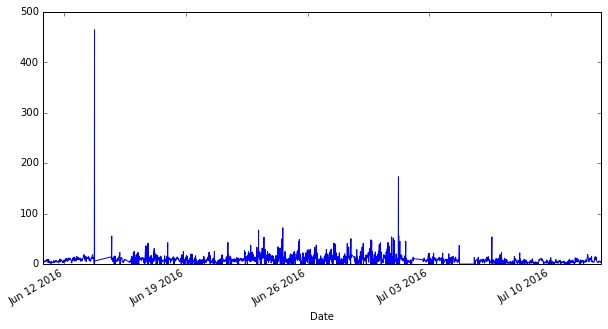

In [6]:
plt.figure(figsize=(10,5))
dataf['Asterionellopsis'].plot()